In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import KernelPCA
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import pickle

In [2]:
#load and read dataset
data_module= pd.read_csv('Social_Network_Ads.csv')
data_module.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
data_module.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.7+ KB


In [4]:
data_module.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [5]:
#check duplicated values
data_module.duplicated().sum()

0

In [6]:
#check null values 
data_module.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [7]:
#Feature & Lables
x=data_module.iloc[:,[2,3]].values
y=data_module.iloc[:,4].values

In [8]:
#splitting data set into train and test dataset
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)
print(x_train.shape,x_test.shape, y_train.shape,y_test.shape)

(320, 2) (80, 2) (320,) (80,)


In [9]:
file=open("test.csv","wb")
pickle.dump(x_test,file)
pickle.dump(y_test,file)
file.close()

In [10]:
#split train,test to crossvalidation dartaset
x_train,x_cv,y_train,y_cv =train_test_split(x_train,y_train,test_size=0.30,random_state=0)
print(x_train.shape,x_cv.shape,y_train.shape,y_cv.shape)

(224, 2) (96, 2) (224,) (96,)


In [11]:
#Feature Scaling
sc=StandardScaler()
x_train = sc.fit_transform(x_train)
x_cv= sc.transform(x_cv)
print(x_train.shape,x_cv.shape)

(224, 2) (96, 2)


In [12]:
# Applying Kernel PCA
kpca = KernelPCA(n_components = 2, kernel = 'rbf')
x_train = kpca.fit_transform(x_train)
x_cv = kpca.transform(x_cv)


In [13]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)


/home/admin172/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
# Predicting the Test set results
y_pred = classifier.predict(x_cv)
print(y_pred)

[1 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 0 0
 1 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 1 1 0 0 1 1 0
 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [15]:
#calculate confusion matrix
cm = confusion_matrix(y_cv,y_pred)
print(cm)

[[53  6]
 [13 24]]


In [16]:
print(classification_report(y_cv,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85        59
           1       0.80      0.65      0.72        37

    accuracy                           0.80        96
   macro avg       0.80      0.77      0.78        96
weighted avg       0.80      0.80      0.80        96



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


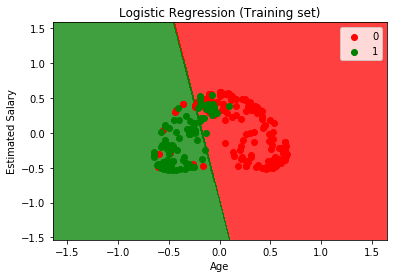

In [17]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = x_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [18]:
file = open("model1.pickle","wb")
pickle.dump(classifier,file)
pickle.dump(sc,file)
file.close()

In [19]:
file = open("model2.pickle","wb")
pickle.dump(kpca,file)
file.close()